In [17]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Download historical data for Apple (AAPL)
data = yf.download("AAPL", start="2010-01-01")

# Extract the 'Close' price
data = data["Close"].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for training
def create_sequences(data, seq_length, prediction_days):
    x, y = [], []
    for i in range(len(data) - seq_length - prediction_days + 1):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length:i+seq_length+prediction_days])
    return np.array(x), np.array(y)

# Define sequence length and prediction days
seq_length = 90
prediction_days = 15

# Create training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]
x_train, y_train = create_sequences(train_data, seq_length, prediction_days)
x_test, y_test = create_sequences(test_data, seq_length, prediction_days)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(prediction_days))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(x_test)



[*********************100%***********************]  1 of 1 completed

Epoch 1/50



c:\Users\omar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [9]:
y_test.shape, predictions.shape

((649, 15, 1), (649, 15))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


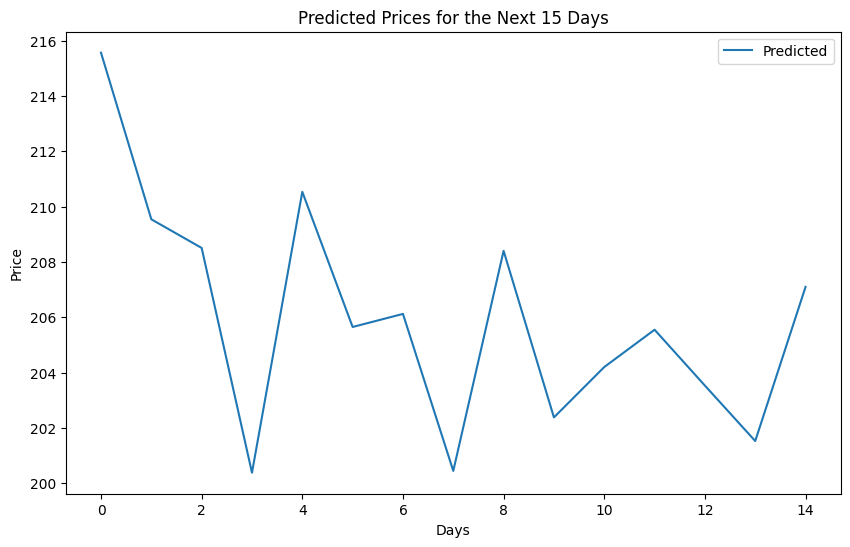

In [10]:
import matplotlib.pyplot as plt
# Predict for the last sequence in the test set
last_sequence = x_test[-1].reshape(1, seq_length, 1) 
predicted_values = model.predict(last_sequence)

# Inverse transform the predicted values
predicted_values = scaler.inverse_transform(predicted_values)

# Visualize the prediction
plt.figure(figsize=(10, 6))
plt.plot(predicted_values[0], label="Predicted")
plt.title("Predicted Prices for the Next 15 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


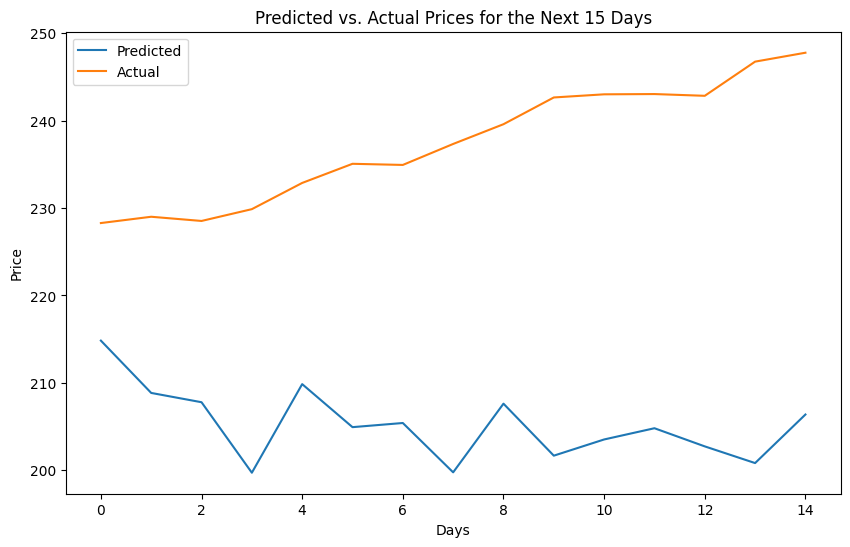

In [11]:
# ... (your previous code)

# Predict for the second-to-last sequence in the test set
last_sequence = x_test[-2].reshape(1, seq_length, 1) 
predicted_values = model.predict(last_sequence)

# Inverse transform the predicted values
predicted_values = scaler.inverse_transform(predicted_values)

# Extract the actual values for the second-to-last sequence
actual_values = y_test[-2] 
actual_values = scaler.inverse_transform(actual_values)

# Visualize the prediction and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_values[0], label="Predicted")
plt.plot(actual_values, label="Actual")
plt.title("Predicted vs. Actual Prices for the Next 15 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [12]:
predicted_values

array([[214.82748, 208.84042, 207.77716, 199.7109 , 209.84906, 204.92567,
        205.3998 , 199.75485, 207.6124 , 201.66295, 203.51646, 204.80162,
        202.7244 , 200.81479, 206.37163]], dtype=float32)

In [13]:
actual_values = y_test[-2]
actual_values = scaler.inverse_transform(actual_values)
actual_values

array([[228.27999878],
       [229.        ],
       [228.52000427],
       [229.86999512],
       [232.86999512],
       [235.05999756],
       [234.92999268],
       [237.33000183],
       [239.58999634],
       [242.6499939 ],
       [243.00999451],
       [243.03999329],
       [242.83999634],
       [246.75      ],
       [247.77000427]])

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



c:\Users\omar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 0.1957 - val_loss: 0.1420
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1119 - val_loss: 0.0556
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0469 - val_loss: 0.0155
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0333 - val_loss: 0.0094
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0207 - val_loss: 0.0059
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0165 - val_loss: 0.0125
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0197 - val_loss: 0.0101
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0165 - val_loss: 0.0044
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0144 - val_loss: 0.0024
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0126 - val_loss: 0.0018
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0120 - val_loss: 0.0021
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0111 - val_loss: 0.0031
Epoch 13/5

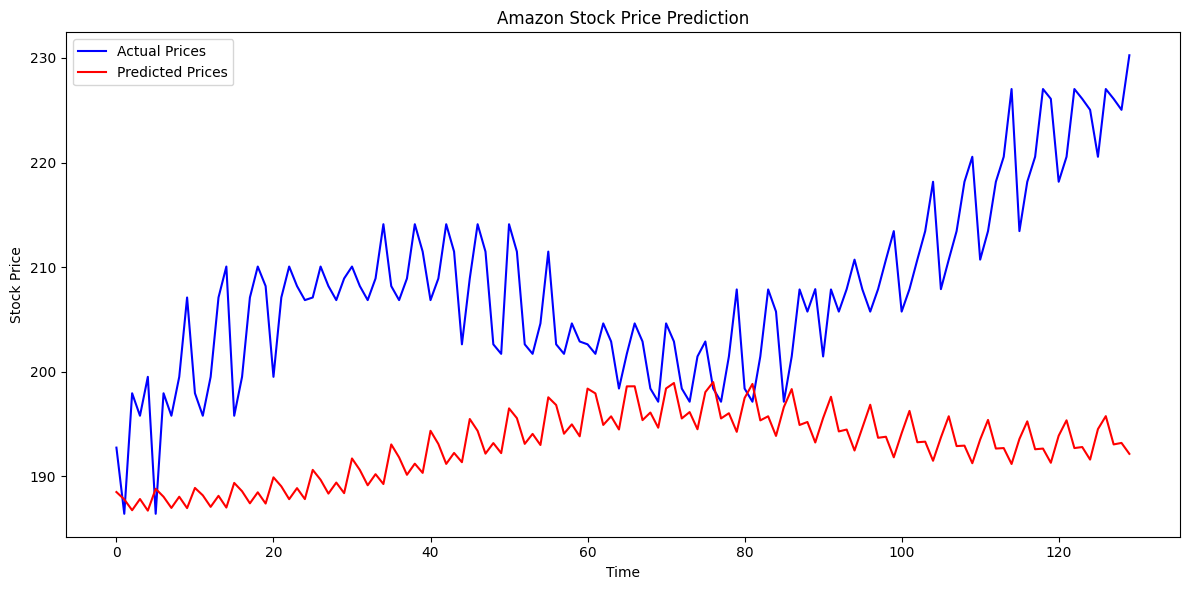

Mean Squared Error: 304.41337580860494
Mean Absolute Error: 14.995180687537562
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step

Next 15 Days Predicted Prices:
Day 1: $199.98
Day 2: $200.94
Day 3: $197.07
Day 4: $197.34
Day 5: $196.58


In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Fetch Amazon stock data
def fetch_amazon_data():
    """
    Fetch Amazon stock data from Yahoo Finance
    
    Returns:
    pandas.DataFrame: Historical stock price data
    """
    ticker = 'AMZN'
    data = yf.download(ticker, period='1y')
    return data

# Prepare data for LSTM model
def prepare_data(data, look_back=90, forecast_horizon=15):
    """
    Prepare data for LSTM model
    
    Parameters:
    data (pandas.DataFrame): Input stock price data
    look_back (int): Number of previous days to use for prediction
    forecast_horizon (int): Number of days to predict
    
    Returns:
    tuple: Scaled data, scaler, prepared X and y for training
    """
    # Use closing prices
    prices = data['Close'].values.reshape(-1, 1)
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(prices)
    
    # Prepare training data
    X, y = [], []
    for i in range(len(scaled_prices) - look_back - forecast_horizon + 1):
        X.append(scaled_prices[i:i+look_back])
        y.append(scaled_prices[i+look_back:i+look_back+forecast_horizon])
    
    return np.array(X), np.array(y), scaler

# Create LSTM model
def create_lstm_model(look_back=90, forecast_horizon=15):
    """
    Create LSTM model architecture
    
    Parameters:
    look_back (int): Number of previous days to use for prediction
    forecast_horizon (int): Number of days to predict
    
    Returns:
    tensorflow.keras.Model: Compiled LSTM model
    """
    # model = Sequential([
    #     LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    #     LSTM(50),
    #     Dense(forecast_horizon)
    # ])
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(forecast_horizon))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Train and predict
def train_and_predict(data, look_back=120, forecast_horizon=5):
    """
    Train LSTM model and make predictions
    
    Parameters:
    data (pandas.DataFrame): Input stock price data
    look_back (int): Number of previous days to use for prediction
    forecast_horizon (int): Number of days to predict
    
    Returns:
    tuple: Actual prices, predicted prices, trained model
    """
    # Prepare data
    X, y, scaler = prepare_data(data, look_back, forecast_horizon)
    
    # Split data
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Create and train model
    model = create_lstm_model(look_back, forecast_horizon)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
    
    # Predict
    predictions = model.predict(X_test)
    
    # Inverse transform predictions and actual values
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
    predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1))
    
    return actual_prices, predicted_prices, model

# Visualize results
def plot_predictions(actual, predicted, data):
    """
    Plot actual vs predicted prices
    
    Parameters:
    actual (numpy.ndarray): Actual stock prices
    predicted (numpy.ndarray): Predicted stock prices
    data (pandas.DataFrame): Original stock price data
    """
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual Prices', color='blue')
    plt.plot(predicted, label='Predicted Prices', color='red')
    plt.title('Amazon Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Fetch data
    data = fetch_amazon_data()
    
    # Train and predict
    actual_prices, predicted_prices, model = train_and_predict(data)
    
    # Visualize results
    plot_predictions(actual_prices, predicted_prices, data)
    
    # Print performance metrics
    mse = np.mean((actual_prices - predicted_prices)**2)
    mae = np.mean(np.abs(actual_prices - predicted_prices))
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    
# افترض أننا قمنا بإنشاء كائن scaler مسبقاً وحفظناه
    scaler = MinMaxScaler(feature_range=(0, 1))
    aapl_prices_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Future prediction
    last_90_days = data['Close'].tail(90).values.reshape(-1, 1)
    last_90_days_scaled = scaler.transform(last_90_days).reshape(1, 90, 1)
    future_prediction = model.predict(last_90_days_scaled)

# إرجاع القيم المتوقعة إلى المقياس الأصلي
    future_prices = scaler.inverse_transform(future_prediction)

# طباعة النتائج
    print("\nNext 15 Days Predicted Prices:")
    for i, price in enumerate(future_prices[0], 1):
        print(f'Day {i}: ${price:.2f}')


if __name__ == '__main__':
    main()

[*********************100%***********************]  1 of 1 completed
c:\Users\omar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - loss: 0.1507 - val_loss: 0.0522
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0271 - val_loss: 0.0162
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0292 - val_loss: 0.0039
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0099 - val_loss: 0.0118
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0127 - val_loss: 0.0163
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0132 - val_loss: 0.0080
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0087 - val_loss: 0.0026
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0092 - val_loss: 0.0025
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0065 - val_loss: 0.0036
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0065 - val_loss: 0.0032


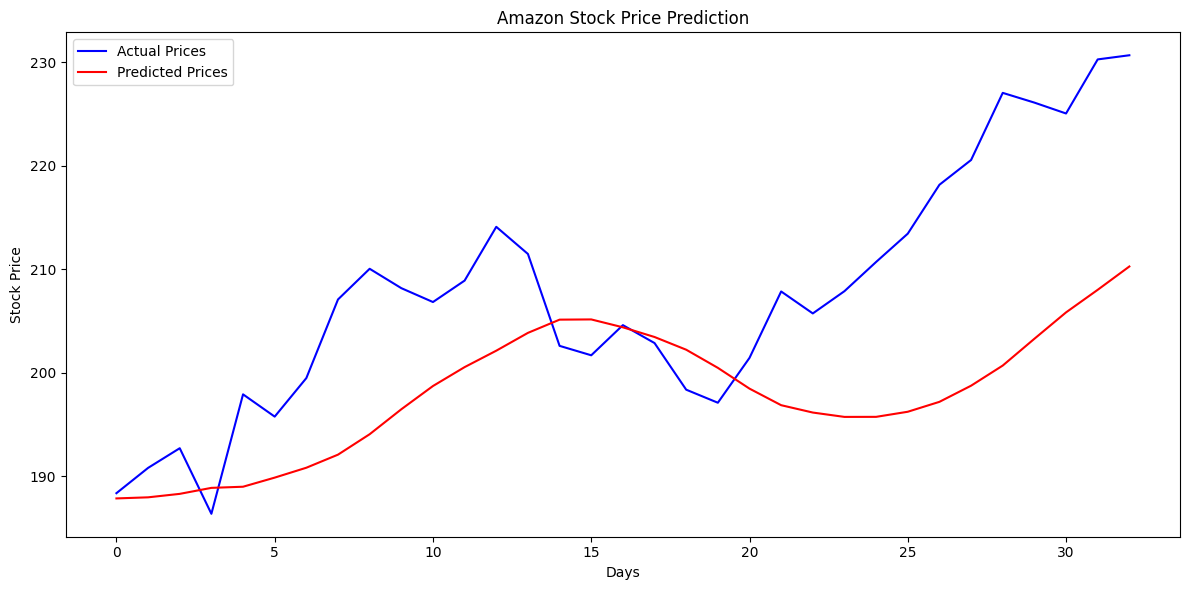

Mean Squared Error: 167.05463431513107
Mean Absolute Error: 10.541604706735322
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Next 15 Days Predicted Prices:
Day 1: $212.28


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

def fetch_amazon_data():
    """
    Fetch Amazon stock data from Yahoo Finance
    
    Returns:
    pandas.DataFrame: Historical stock price data
    """
    ticker = 'AMZN'
    data = yf.download(ticker, period='1y')
    if data.empty:
        raise ValueError("No data retrieved. Check the ticker or internet connection.")
    return data

def prepare_data(data, look_back=90, forecast_horizon=1):
    """
    Prepare data for LSTM model
    
    Parameters:
    data (pandas.DataFrame): Input stock price data
    look_back (int): Number of previous days to use for prediction
    forecast_horizon (int): Number of days to predict
    
    Returns:
    tuple: Scaled data, scaler, prepared X and y for training
    """
    # Use closing prices
    prices = data['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(prices)

    # Prepare training data
    X, y = [], []
    for i in range(len(scaled_prices) - look_back - forecast_horizon + 1):
        X.append(scaled_prices[i:i + look_back])
        y.append(scaled_prices[i + look_back:i + look_back + forecast_horizon])

    return np.array(X), np.array(y), scaler

def create_lstm_model(look_back=90, forecast_horizon=1):
    """
    Create LSTM model architecture
    
    Parameters:
    look_back (int): Number of previous days to use for prediction
    forecast_horizon (int): Number of days to predict
    
    Returns:
    tensorflow.keras.Model: Compiled LSTM model
    """
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(forecast_horizon))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def train_and_predict(data, look_back=90, forecast_horizon=1):
    """
    Train LSTM model and make predictions
    
    Parameters:
    data (pandas.DataFrame): Input stock price data
    look_back (int): Number of previous days to use for prediction
    forecast_horizon (int): Number of days to predict
    
    Returns:
    tuple: Actual prices, predicted prices, trained model
    """
    # Prepare data
    X, y, scaler = prepare_data(data, look_back, forecast_horizon)

    # Split data
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Create and train model
    model = create_lstm_model(look_back, forecast_horizon)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

    # Predict
    predictions = model.predict(X_test)

    # Inverse transform predictions and actual values
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1, forecast_horizon)
    predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(-1, forecast_horizon)

    return actual_prices, predicted_prices, model

def plot_predictions(actual, predicted):
    """
    Plot actual vs predicted prices
    
    Parameters:
    actual (numpy.ndarray): Actual stock prices
    predicted (numpy.ndarray): Predicted stock prices
    """
    plt.figure(figsize=(12, 6))
    plt.plot(actual.flatten(), label='Actual Prices', color='blue')
    plt.plot(predicted.flatten(), label='Predicted Prices', color='red')
    plt.title('Amazon Stock Price Prediction')
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Fetch data
    data = fetch_amazon_data()

    # Train and predict
    actual_prices, predicted_prices, model = train_and_predict(data)

    # Visualize results
    plot_predictions(actual_prices, predicted_prices)

    # Print performance metrics
    mse = np.mean((actual_prices.flatten() - predicted_prices.flatten()) ** 2)
    mae = np.mean(np.abs(actual_prices.flatten() - predicted_prices.flatten()))
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')

    # Future prediction
    look_back = 90
    last_90_days = data['Close'].tail(look_back).values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_prices = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
    last_90_days_scaled = scaler.transform(last_90_days).reshape(1, look_back, 1)
    future_prediction = model.predict(last_90_days_scaled)
    future_prices = scaler.inverse_transform(future_prediction)

    print("\nNext 15 Days Predicted Prices:")
    for i, price in enumerate(future_prices[0], 1):
        print(f'Day {i}: ${price:.2f}')

if __name__ == '__main__':
    main()

